In [1]:
import torch
import pytorch_mask_rcnn as pmr


use_cuda = False
dataset = "coco"
ckpt_path = "/home/kaya/PyTorch-Simple-MaskRCNN/maskrcnn_coco-3.pth"
data_dir = "/home/kaya/PyTorch-Simple-MaskRCNN/image"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "val", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(True, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint
    
for p in model.parameters():
    p.requires_grad_(False)


device: cpu
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.366
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.208
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.402
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.248
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.210
 Averag

Empty segment, skipping drawing.
Segment size is not valid for reshaping, skipping.


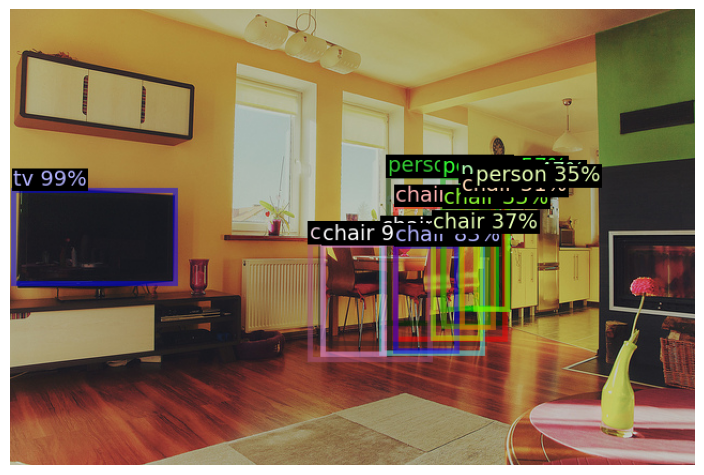

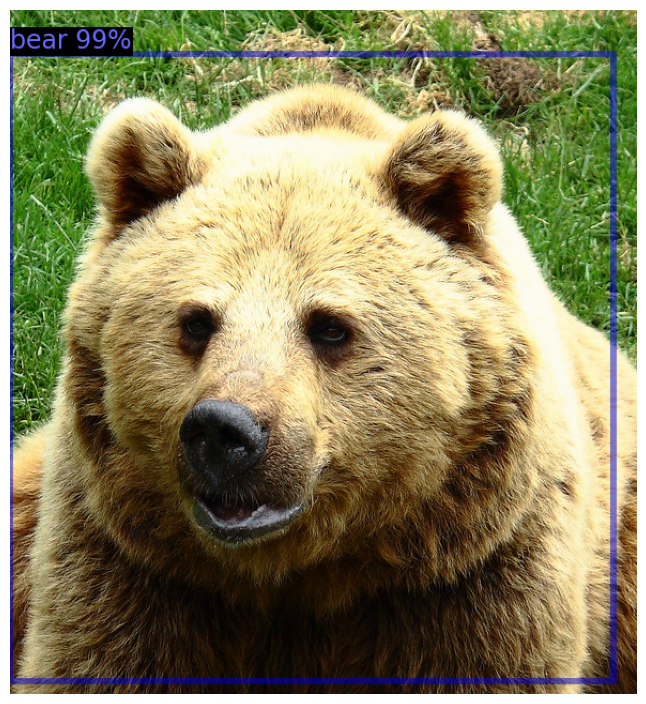

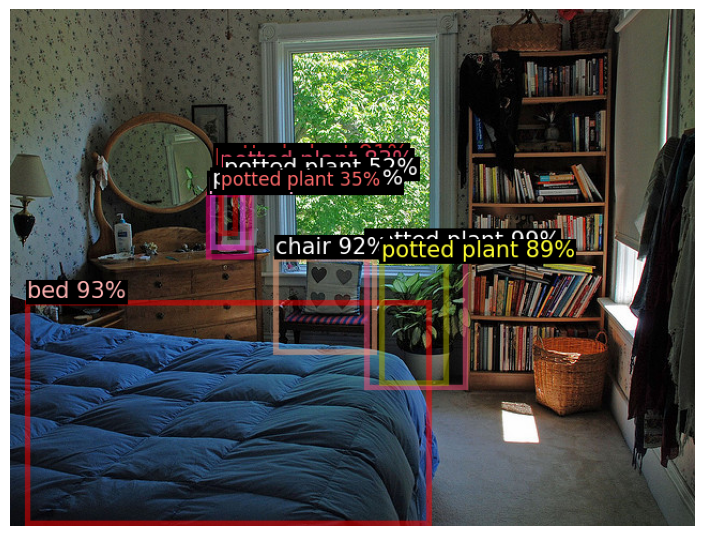

In [3]:
import pytorch_mask_rcnn.visualizer as vis
iters = 3

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}
    
    with torch.no_grad():
        result = model(image)
    
    vis.show(image, result, ds.classes, "/home/kaya/PyTorch-Simple-MaskRCNN/image".format(i))

    if i >= iters - 1:
        break